# Ejercicio 1

a.	Transcribir el algoritmo escrito en Python a un archivo .pdf de acuerdo con los siguientes parámetros: número de partículas = 20, máximo número de iteraciones 50, coeficientes de aceleración c1 = c2 = 1.4944, factor de inercia w = 0.6. 

In [17]:
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    return 375 * x[0] + 275 * x[1] + 475 * x[2] + 325 * x[3]

def g1(x):
    return 2.5 * x[0] + 1.5 * x[1] + 2.75 * x[2] + 2 * x[3] <= 640

def g2(x):
    return 3.5 * x[0] + 3 * x[1] + 3 * x[2] + 2 * x[3] <= 960 

def g3(x):
    return x[0] >= 0

def g4(x):
    return x[1] >= 0

def g5(x):
    return x[2] >= 0

def g6(x):
    return x[3] >= 0

def initialize_particles(n_particles, n_dimensions):
    x = np.zeros((n_particles, n_dimensions))
    v = np.zeros((n_particles, n_dimensions))
    pbest = np.zeros((n_particles, n_dimensions))
    pbest_fit = -np.inf * np.ones(n_particles)
    gbest = np.zeros(n_dimensions)
    gbest_fit = -np.inf

    for i in range(n_particles):
        while True:
            x[i] = np.random.uniform(0, 10, n_dimensions)
            if all([g1(x[i]), g2(x[i]), g3(x[i]), g4(x[i]), g5(x[i]), g6(x[i])]):
                break
        v[i] = np.random.uniform(-1, 1, n_dimensions)
        pbest[i] = x[i].copy()
        fit = f(x[i])
        if fit > pbest_fit[i]:
            pbest_fit[i] = fit

    return x, v, pbest, pbest_fit, gbest, gbest_fit

def optimize(n_particles, n_dimensions, max_iterations, c1, c2, w):
    x, v, pbest, pbest_fit, gbest, gbest_fit = initialize_particles(n_particles, n_dimensions)
    gbest_array_iter = []

    for _ in range(max_iterations):
        for i in range(n_particles):
            fit = f(x[i])
            if fit > pbest_fit[i] and all([g1(x[i]), g2(x[i]), g3(x[i]), g4(x[i]), g5(x[i]), g6(x[i])]):
                pbest_fit[i] = fit
                pbest[i] = x[i].copy()
                if fit > gbest_fit:
                    gbest_fit = fit
                    gbest = x[i].copy()

            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]

            if not all([g1(x[i]), g2(x[i]), g3(x[i]), g4(x[i]), g5(x[i]), g6(x[i])]):
                x[i] = pbest[i].copy()

        gbest_array_iter.append(gbest)

    return gbest, gbest_fit, gbest_array_iter

def plot_results(gbest_array_iter, max_iterations):
    iteraciones = np.arange(0, max_iterations)
    plt.plot(iteraciones, gbest_array_iter, label='gbest')
    plt.title('gbest en función de iteración')
    plt.xlabel('Iteraciones')
    plt.ylabel('gbest')
    plt.legend()
    plt.show()

def main():
    n_particles = 20
    n_dimensions = 4
    max_iterations = 50
    c1 = c2 = 1.4944
    w = 0.6

    np.random.seed(153)

    gbest, gbest_fit, gbest_array_iter = optimize(n_particles, n_dimensions, max_iterations, c1, c2, w)

    print("Mejor solución: ", gbest)
    print("Valor óptimo: ", gbest_fit)

    plot_results(gbest_array_iter, max_iterations)

Mejor solución:  [ 15.2402649  126.6574484   94.99925617  75.33260476]
Valor óptimo:  110153.64087969656


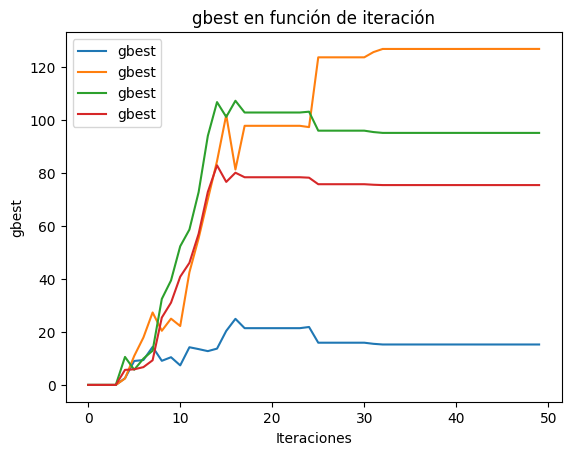

In [18]:
main()

e.	Explicar (en el .pdf) y demostrar (desde el código fuente) que sucede si se reduce en 1 unidad el tiempo de acabado de la parte B. 

In [19]:
def g2(x):
    return 3.5 * x[0] + 2 * x[1] + 3 * x[2] + 2 * x[3] <= 960

Mejor solución:  [ 15.2402649  126.6574484   94.99925617  75.33260476]
Valor óptimo:  110153.64087969656


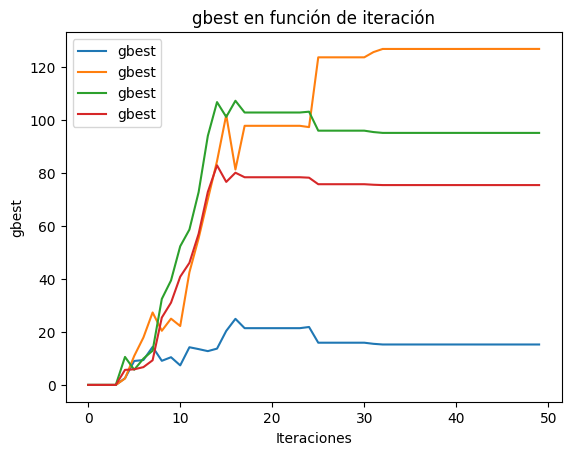

In [20]:
main()

f.	Realizar 3 boxplots a partir de los gbest de 3 variantes de solución: i) El primer boxplot con el coeficiente de inercia constante w = 0.8, ii) El segundo boxplot con el coeficiente de inercia dinámico lineal y iii) El tercer boxplot sin coeficiente de inercia pero aplicando Factor de constricción con φ a elección. 

In [23]:
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    return 375 * x[0] + 275 * x[1] + 475 * x[2] + 325 * x[3]

def g1(x):
    return 2.5 * x[0] + 1.5 * x[1] + 2.75 * x[2] + 2 * x[3] <= 640

def g2(x):
    return 3.5 * x[0] + 2 * x[1] + 3 * x[2] + 2 * x[3] <= 960 

def g3(x):
    return x[0] >= 0

def g4(x):
    return x[1] >= 0

def g5(x):
    return x[2] >= 0

def g6(x):
    return x[3] >= 0

def initialize_particles(n_particles, n_dimensions):
    x = np.zeros((n_particles, n_dimensions))
    v = np.zeros((n_particles, n_dimensions))
    pbest = np.zeros((n_particles, n_dimensions))
    pbest_fit = -np.inf * np.ones(n_particles)
    gbest = np.zeros(n_dimensions)
    gbest_fit = -np.inf

    for i in range(n_particles):
        while True:
            x[i] = np.random.uniform(0, 10, n_dimensions)
            if all([g1(x[i]), g2(x[i]), g3(x[i]), g4(x[i]), g5(x[i]), g6(x[i])]):
                break
        v[i] = np.random.uniform(-1, 1, n_dimensions)
        pbest[i] = x[i].copy()
        fit = f(x[i])
        if fit > pbest_fit[i]:
            pbest_fit[i] = fit

    return x, v, pbest, pbest_fit, gbest, gbest_fit

def optimize(n_particles, n_dimensions, max_iterations, c1, c2, w_func):
    x, v, pbest, pbest_fit, gbest, gbest_fit = initialize_particles(n_particles, n_dimensions)
    gbest_array_iter = []

    for iteration in range(max_iterations):
        w = w_func(iteration, max_iterations)
        for i in range(n_particles):
            fit = f(x[i])
            if fit > pbest_fit[i] and all([g1(x[i]), g2(x[i]), g3(x[i]), g4(x[i]), g5(x[i]), g6(x[i])]):
                pbest_fit[i] = fit
                pbest[i] = x[i].copy()
                if fit > gbest_fit:
                    gbest_fit = fit
                    gbest = x[i].copy()

            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]

            if not all([g1(x[i]), g2(x[i]), g3(x[i]), g4(x[i]), g5(x[i]), g6(x[i])]):
                x[i] = pbest[i].copy()

        gbest_array_iter.append(gbest_fit)

    return gbest_array_iter

def constant_inertia_w(iteration, max_iterations):
    return 0.8

def dynamic_inertia_w(iteration, max_iterations):
    return 0.9 - (0.5 * (iteration / max_iterations))

def constriction_factor_w(iteration, max_iterations):
    phi = 4.1
    k = 2 / abs(2 - phi - np.sqrt(phi**2 - 4*phi))
    return k

def plot_boxplots(results):
    plt.boxplot(results, labels=['Constante w=0.8', 'Dinámico', 'Factor de constricción'])
    plt.title('Comparación de variantes de PSO')
    plt.ylabel('gbest')
    plt.show()

def main():
    n_particles = 20
    n_dimensions = 4
    max_iterations = 50
    c1 = c2 = 1.4944

    np.random.seed(153)

    results = []
    results.append(optimize(n_particles, n_dimensions, max_iterations, c1, c2, constant_inertia_w))
    results.append(optimize(n_particles, n_dimensions, max_iterations, c1, c2, dynamic_inertia_w))
    results.append(optimize(n_particles, n_dimensions, max_iterations, c1, c2, constriction_factor_w))

    plot_boxplots(results)

C:\Users\sevann radhak\AppData\Local\Temp\ipykernel_2616\2480585914.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=['Constante w=0.8', 'Dinámico', 'Factor de constricción'])


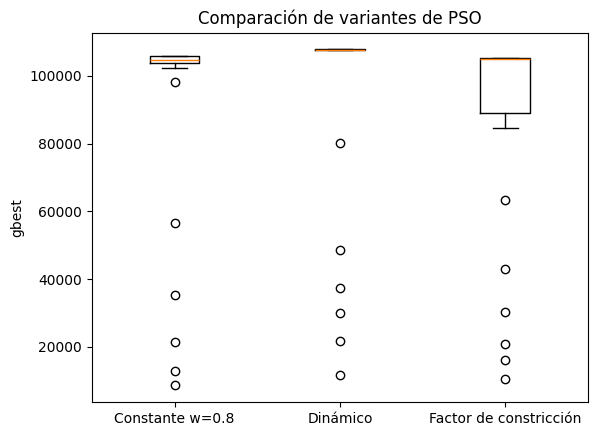

In [24]:
main()